# P_0 - Variable Length, Full Starting Population

## Introduction

In [1]:
%cd .
%pwd
%cd "raw_data/210_HGT_VarLength_ProbSweep__Task__InjectAll/"
#%mkdir "analysis"
%cd "analysis"
%pwd

/home/rosiec/Dropbox/School_Docs/Research/HGT
/home/rosiec/tmp/raw_data/210_HGT_VarLength_ProbSweep__Task__InjectAll
/home/rosiec/tmp/raw_data/210_HGT_VarLength_ProbSweep__Task__InjectAll/analysis


u'/home/rosiec/tmp/raw_data/210_HGT_VarLength_ProbSweep__Task__InjectAll/analysis'

In [2]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.17.1'

In [3]:
#%pwd
%cat ../P_0_hgtbonus_210001/data/log_average.dat | head -n 20

# Avida Fitness Data
# Tue Jan 26 17:13:45 2016
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
100 0.286748 0.00213852 0.0164547 -1.30465 0.00485776 0.0849049 
200 1.71407 0.0798204 22.9176 -0.645559 0.0193077 1.34092 
300 1234.02 107.336 4.1441e+07 2.15267 0.0626559 14.121 
400 859.729 149.786 8.04104e+07 3.13831 0.0607316 13.219 
500 606.92 38.6152 5.33229e+06 1.49337 0.0612428 13.4124 
600 17823 1752.23 1.09579e+10 1.7065 0.0687442 16.8663 
700 22515.2 1820.85 1.18297e+10 1.83921 0.0727348 18.876 
800 848217 90499.1 2.92959e+13 2.62783 0.0866216 26.8393 
900 558422 50904.1 9.26624e+12 2.55887 0.0862324 26.5912 


In [4]:
import sys
sys.path.append("~/Dropbox/School_Docs/Research/research_scripts/")
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  -a, --all             display all lines of a source
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --data_members=MEMBER_COUNT
                        Number of Components from a given data source
                        (treatment)
  --alt_axis=ALT_AXIS   Use an alternative axis for the Nth data source
  --xtick_multiplier=XTICK_MULTIPLIER
                        X-axis Tick 

## Fitnesses

Aggregating control
Aggregating hgtbonus
Aggregating hgt
Aggregating bonus

Plotting 210_fitness


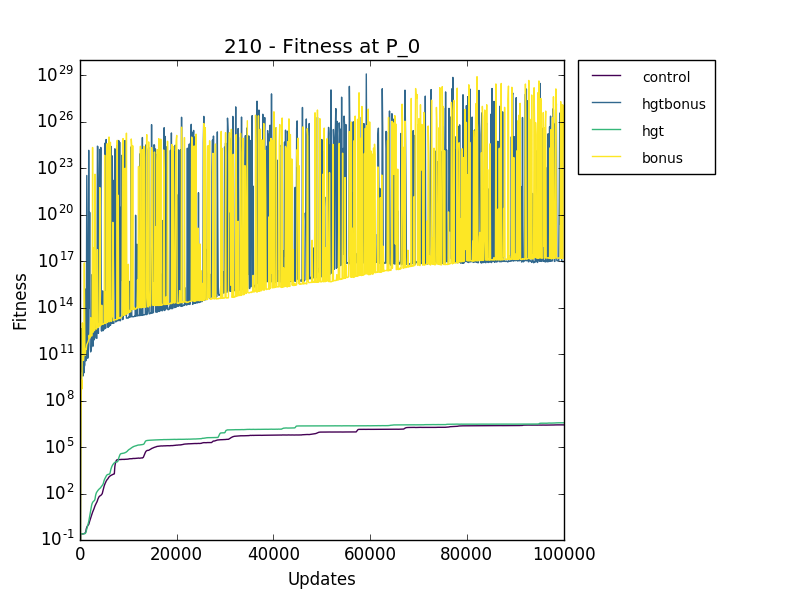

In [5]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--samples 100 \
--ylog --title "210 - Fitness at P_0" \
--xlabel "Updates" --ylabel "Fitness" --xtick_multiplier 100 \
210_fitness \
average.dat 4 \"../P_0_control_*/data*/\" control \
average.dat 4 \"../P_0_hgtbonus_*/data*/\" hgtbonus \
average.dat 4 \"../P_0_hgt_*/data*/\" hgt \
average.dat 4 \"../P_0_bonus_*/data*/\" bonus 


ipyImage(filename='210_fitness.png') 

Aggregating control
Aggregating hgtbonus
Aggregating hgt
Aggregating bonus

Plotting 210_log_fitness


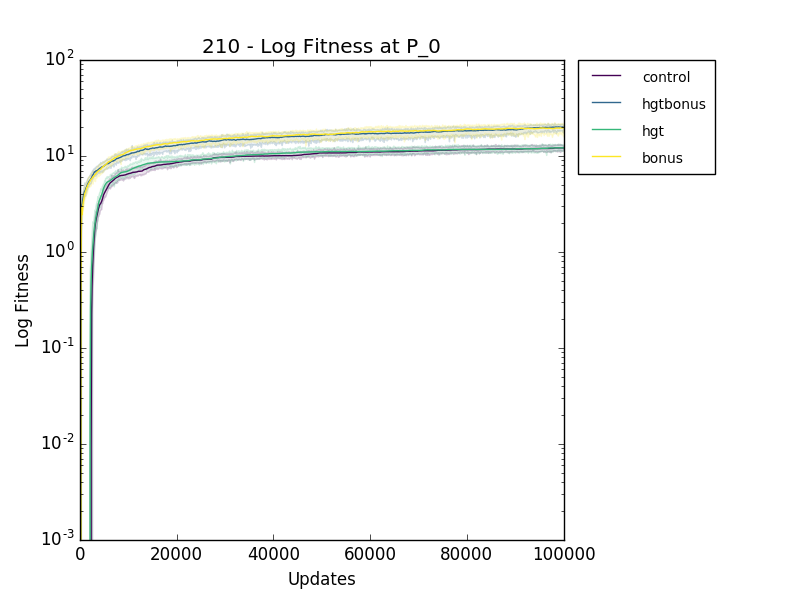

In [7]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error --samples 100 \
--ylog --title "210 - Log Fitness at P_0" \
--xlabel "Updates" --ylabel "Log Fitness" --xtick_multiplier 100 \
210_log_fitness \
log_average.dat 5 \"../P_0_control_*/data*/\" control \
log_average.dat 5 \"../P_0_hgtbonus_*/data*/\" hgtbonus \
log_average.dat 5 \"../P_0_hgt_*/data*/\" hgt \
log_average.dat 5 \"../P_0_bonus_*/data*/\" bonus 

ipyImage(filename='210_log_fitness.png') 

## Uptake Rates

In [8]:
cat ../P_0_hgtbonus_210001/data*/hgt.dat | head -n 15

# Horizontal gene transfer statistics
# Tue Jan 26 17:13:45 2016
#  1: Update [update]
#  2: Total count of metabolized genome fragments [metcount]
#  3: Total size of metabolized genome fragments [metsize]
#  4: Total count of insertion events [inscount]
#  5: Total size of insertion events [inssize]
#  6: Simple count of insertion events [inscount] DEBUG-RCK
#  7: Simple count of uptake events [inscount] DEBUG-RCK
#  8: Simple count of recombination events [inscount] DEBUG-RCK
#  9: Simple count of bonus events [inscount] DEBUG-RCK

0 0 0 0 0 0 0 0 0 
100 0 0 0 0 0 14982 0 14982 
200 0 0 0 0 0 96812 0 96812 


Aggregating control_Up
Aggregating control_Rec
Aggregating control_Bon
Aggregating hgtbonus_Up
Aggregating hgtbonus_Rec
Aggregating hgtbonus_Bon
Aggregating hgt_Up
Aggregating hgt_Rec
Aggregating hgt_Bon
Aggregating bonus_Up
Aggregating bonus_Rec
Aggregating bonus_Bon

Plotting 210_uptakerecbon


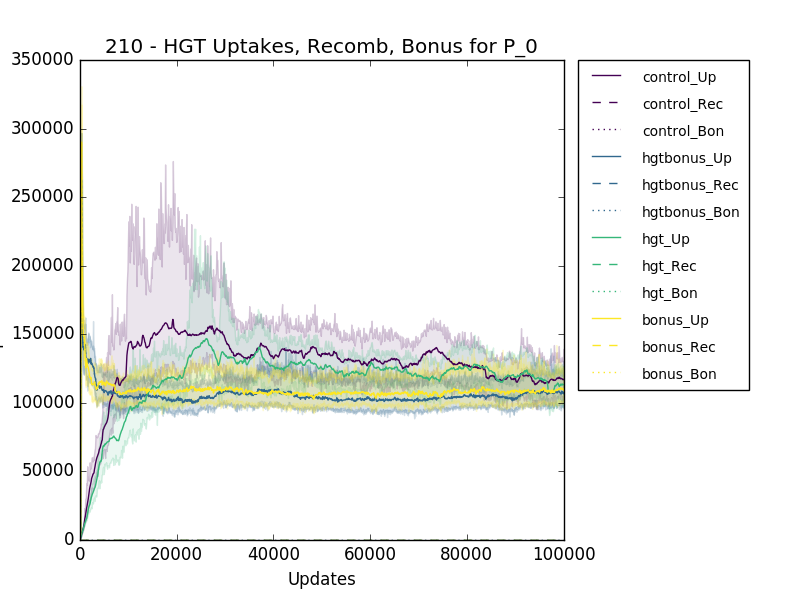

In [9]:
%run ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py \
--error \
--samples 100 \
--title "210 - HGT Uptakes, Recomb, Bonus for P_0" \
--xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members 3 \
210_uptakerecbon \
hgt.dat 7 \"../P_0_control_*/data*/\" control_Up \
hgt.dat 8 \"../P_0_control_*/data*/\" control_Rec \
hgt.dat 9 \"../P_0_control_*/data*/\" control_Bon \
hgt.dat 7 \"../P_0_hgtbonus*/data*/\" hgtbonus_Up \
hgt.dat 8 \"../P_0_hgtbonus*/data*/\" hgtbonus_Rec \
hgt.dat 9 \"../P_0_hgtbonus*/data*/\" hgtbonus_Bon \
hgt.dat 7 \"../P_0_hgt_*/data*/\" hgt_Up \
hgt.dat 8 \"../P_0_hgt_*/data*/\" hgt_Rec \
hgt.dat 9 \"../P_0_hgt_*/data*/\" hgt_Bon \
hgt.dat 7 \"../P_0_bonus_*/data*/\" bonus_Up \
hgt.dat 8 \"../P_0_bonus_*/data*/\" bonus_Rec \
hgt.dat 9 \"../P_0_bonus_*/data*/\" bonus_Bon \

ipyImage(filename='210_uptakerecbon.png') 

## Uptake Rates for all sub-treatments (control, hgt+bonus, etc.)

In [10]:
def plot_it(TREATM, #205 
               PROB, #0.001 
               filename, #hgt.dat
               descr, #HGT Uptakes
               columns, #[7,8]
               colnames, #['U','R'] 
               subtreats, #['control', 'hgt', 'hgtbonus', 'bonus']
               basename, #hgt_uptake_recomb 
               verbose=True):
    ROOT_TREATMENT="P_"+PROB

    !echo $ROOT_TREATMENT
    !echo $TREATM

    #!python2
    script = ' \
~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 \
--title "' + descr + ' (Uptake_P: '+PROB+')" \
--xlabel "Updates" \
--ylabel "Uptake Events" --xtick_multiplier 100 \
--data_members '+ str(len(columns)) +' \
'+TREATM+'_'+basename+'_'+PROB+' \
'
    for trt in subtreats:
        for col, coln in zip(columns, colnames):
            script += filename + ' '\
            + str(col) + ' "../'\
            + ROOT_TREATMENT + '_' + trt + '_*/data*/" ' + trt + '_' + coln + ' '
    
    if verbose:
        script += '\
2>/dev/null'
        print script
    else:
        script += '\
>/dev/null 2>&1'
        print script
        
    !python2 $script
    
    return TREATM+'_'+basename+'_'+PROB+'.png'



P_0
210
 ~/Dropbox/School_Docs/Research/research_scripts/quickplot.py --error --samples 100 --title "HGT Uptakes (Uptake_P: 0)" --xlabel "Updates" --ylabel "Uptake Events" --xtick_multiplier 100 --data_members 2 210_hgt_uptake_recomb_0 hgt.dat 7 "../P_0_control_*/data*/" control_U hgt.dat 8 "../P_0_control_*/data*/" control_R hgt.dat 7 "../P_0_hgt_*/data*/" hgt_U hgt.dat 8 "../P_0_hgt_*/data*/" hgt_R hgt.dat 7 "../P_0_hgtbonus_*/data*/" hgtbonus_U hgt.dat 8 "../P_0_hgtbonus_*/data*/" hgtbonus_R hgt.dat 7 "../P_0_bonus_*/data*/" bonus_U hgt.dat 8 "../P_0_bonus_*/data*/" bonus_R >/dev/null 2>&1


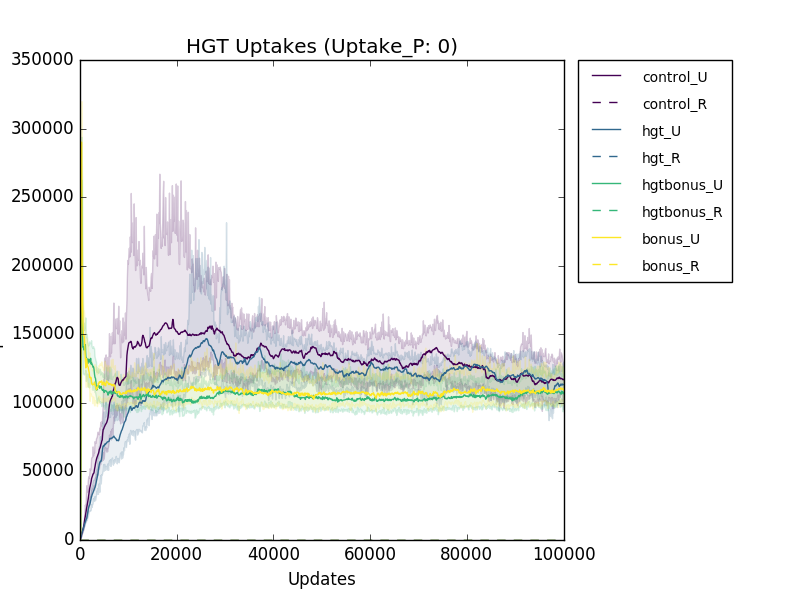

In [11]:
files = []
files.append( plot_it("210", "0", "hgt.dat", "HGT Uptakes", 
                   [7,8], ['U','R'], 
                    ['control', 'hgt', 'hgtbonus', 'bonus'],  
                   "hgt_uptake_recomb", verbose=True ))
ipyImage(filename=files[0]) 